### Student Information

Name:李博業 (NTPU) **Bo-Ye,Li**

Student ID: 410978058

GitHub ID: BORYA-dev

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## **Table of Contents**

1. **Second Question**

- 2.1 Download Data
- 2.2 Adding columns
- 2.3 Data Mining with Pandas
    - Missing Values
    - Duplicated check
- 2.4 Data Preprocessing
    - Data sampling
    - Feature creation
    - Feature subset selection
    - Attribute Transformation/Aggregation
    - Frequent Pattern
    - Dimension Reduction
    - Discretization and Binarization
- 2.5 Data Exploration
- 2.6 Data Classification




In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot  as plt
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import random as rd
import plotly.express as px 
import math
from PAMI.extras.convert.DF2DB import DF2DB  
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.frequentPattern.basic import FPGrowth as alg

#### 1. Download Data

In [4]:
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [5]:
df.head()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [6]:
df.sentiment.unique()  # 2 category 

array(['not nostalgia', 'nostalgia'], dtype=object)

In [7]:
print(df.comment[0])  #take a look at comment

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


In [8]:
df.shape  # it's has 2 columns and 1500 rows

(1500, 2)

#### 2. Adding columns
- add a digital category column
    - 0 : non-nostalgia
    - 1 : nostalgia

In [9]:
# add a digital category column
df["category"] = list(map(lambda x : 1 if x == "nostalgia" else 0, df.sentiment) )

In [10]:
df.head()

,sentiment,comment,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1


### 3. Data Mining using Pandas
- 3.1 : Missing Values checking
- 3.2 : Duplicated data checking

##### 3.1 Missing value 

In [11]:
df.isna().sum()

sentiment    0
comment      0
category     0
dtype: int64

In [12]:
df.sentiment.value_counts()  # check there is no weird value in sentiment column

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64

In [13]:
# check weird value in comment by its length, if its length is zero then delete
try: 
    list(map(lambda x : len(x),df.comment)).index(0)
except ValueError : 
    print("The comment string lenght is more than 0, which means there is no empty value in Comment ! ")


The comment string lenght is more than 0, which means there is no empty value in Comment ! 


##### 3.2 Duplicated check 

In [14]:
if df.duplicated().sum( axis = 0 ) > 0:
    print(f"There is {df.duplicated().sum( axis = 0 )} duplicated data.")
    print(df.loc[df.duplicated(),:])
    df.drop_duplicates(keep = "first", inplace = True)  # maybe we can keep one

There is 1 duplicated data.
        sentiment                                            comment  category
78  not nostalgia  never heard this song before... WOW What an am...         0


In [15]:
df.duplicated().sum() # Done ! 
print(df.shape)  #delete the duplicated one

(1499, 3)


### 4. Data Preprocessing
- Data sampling
- Feature Creation
- Feature subset selection
- Attribute Transformation / Aggregation
- Frequent Pattern
- Dimension Reduction
- Discretization and Binarization

##### 4.1 Data Sampling

In [16]:
df_sample =  df.sample( n = 100 )

In [17]:
df.sentiment.value_counts()

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

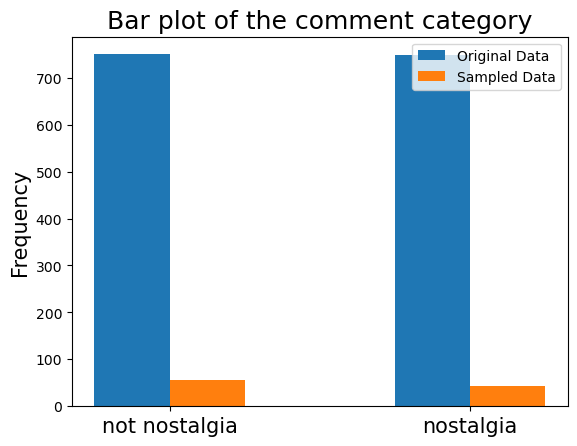

In [18]:
plt.figure()


plt.bar(list(df.sentiment.unique()),list(df.sentiment.value_counts()), width = -0.25, align = "edge")
plt.bar(list(df.sentiment.unique()),list(df_sample.sentiment.value_counts()),width = 0.25, align = "edge")


plt.title("Bar plot of the comment category", size = 18)
plt.legend(["Original Data", "Sampled Data"], loc = "upper right")
plt.ylabel("Frequency", size = 15)
plt.xticks(size = 15)

plt.show()

In [19]:
list(df.sentiment.value_counts())

[750, 749]

##### 4.2 Feature Creation
- Apply **nltk library** to seperate our comment and conduct tokenization(代碼化).

In [20]:
def nltk_tokenization(text : str):
    '''
    text : the text you want to tokenized
    '''
    result = [] 
    for i in nltk.sent_tokenize(text):
        result.extend(nltk.word_tokenize(i))
    
    return result

In [21]:
nltk_tokenization(df.comment[0])

['He',
 'was',
 'a',
 'singer',
 'with',
 'a',
 'golden',
 'voice',
 'that',
 'I',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 '.',
 'I',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 '.',
 'Although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 ',',
 'but',
 ',',
 'I',
 'can',
 'vouch',
 'for',
 'Jim',
 'Reeves',
 'all',
 'the',
 'time',
 '.',
 'You',
 'feel',
 'relaxed',
 ',',
 'emotional',
 'and',
 'loving',
 '.',
 'Thank',
 'you',
 'Lord',
 'for',
 'his',
 'life',
 '.']

In [22]:
df["unigrams"] = list(map( lambda x: nltk_tokenization(x) , df.comment))

In [23]:
df.head(5)

,sentiment,comment,category,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m..."


##### 4.3 Feature subset selection
- Generate Document-term matrix

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
# use CounterVectorizer to make document-term matrix
count_vect_2 = CountVectorizer() 
X_counts_2 = count_vect_2.fit_transform(df.comment)  # put in our comment, then X_counts_2 are the result 
print(X_counts_2[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [25]:
# we have 1499 documents and 3730 terms
print(X_counts_2.shape)  

(1499, 3730)


In [26]:
# terms 

count_vect_2.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [27]:
# Document_term matrix 

pd.DataFrame( X_counts_2.toarray(), columns = count_vect_2.get_feature_names_out())

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Use heatmap to evaluate the sparsity
- use subplots and sampled 20 terms and documents

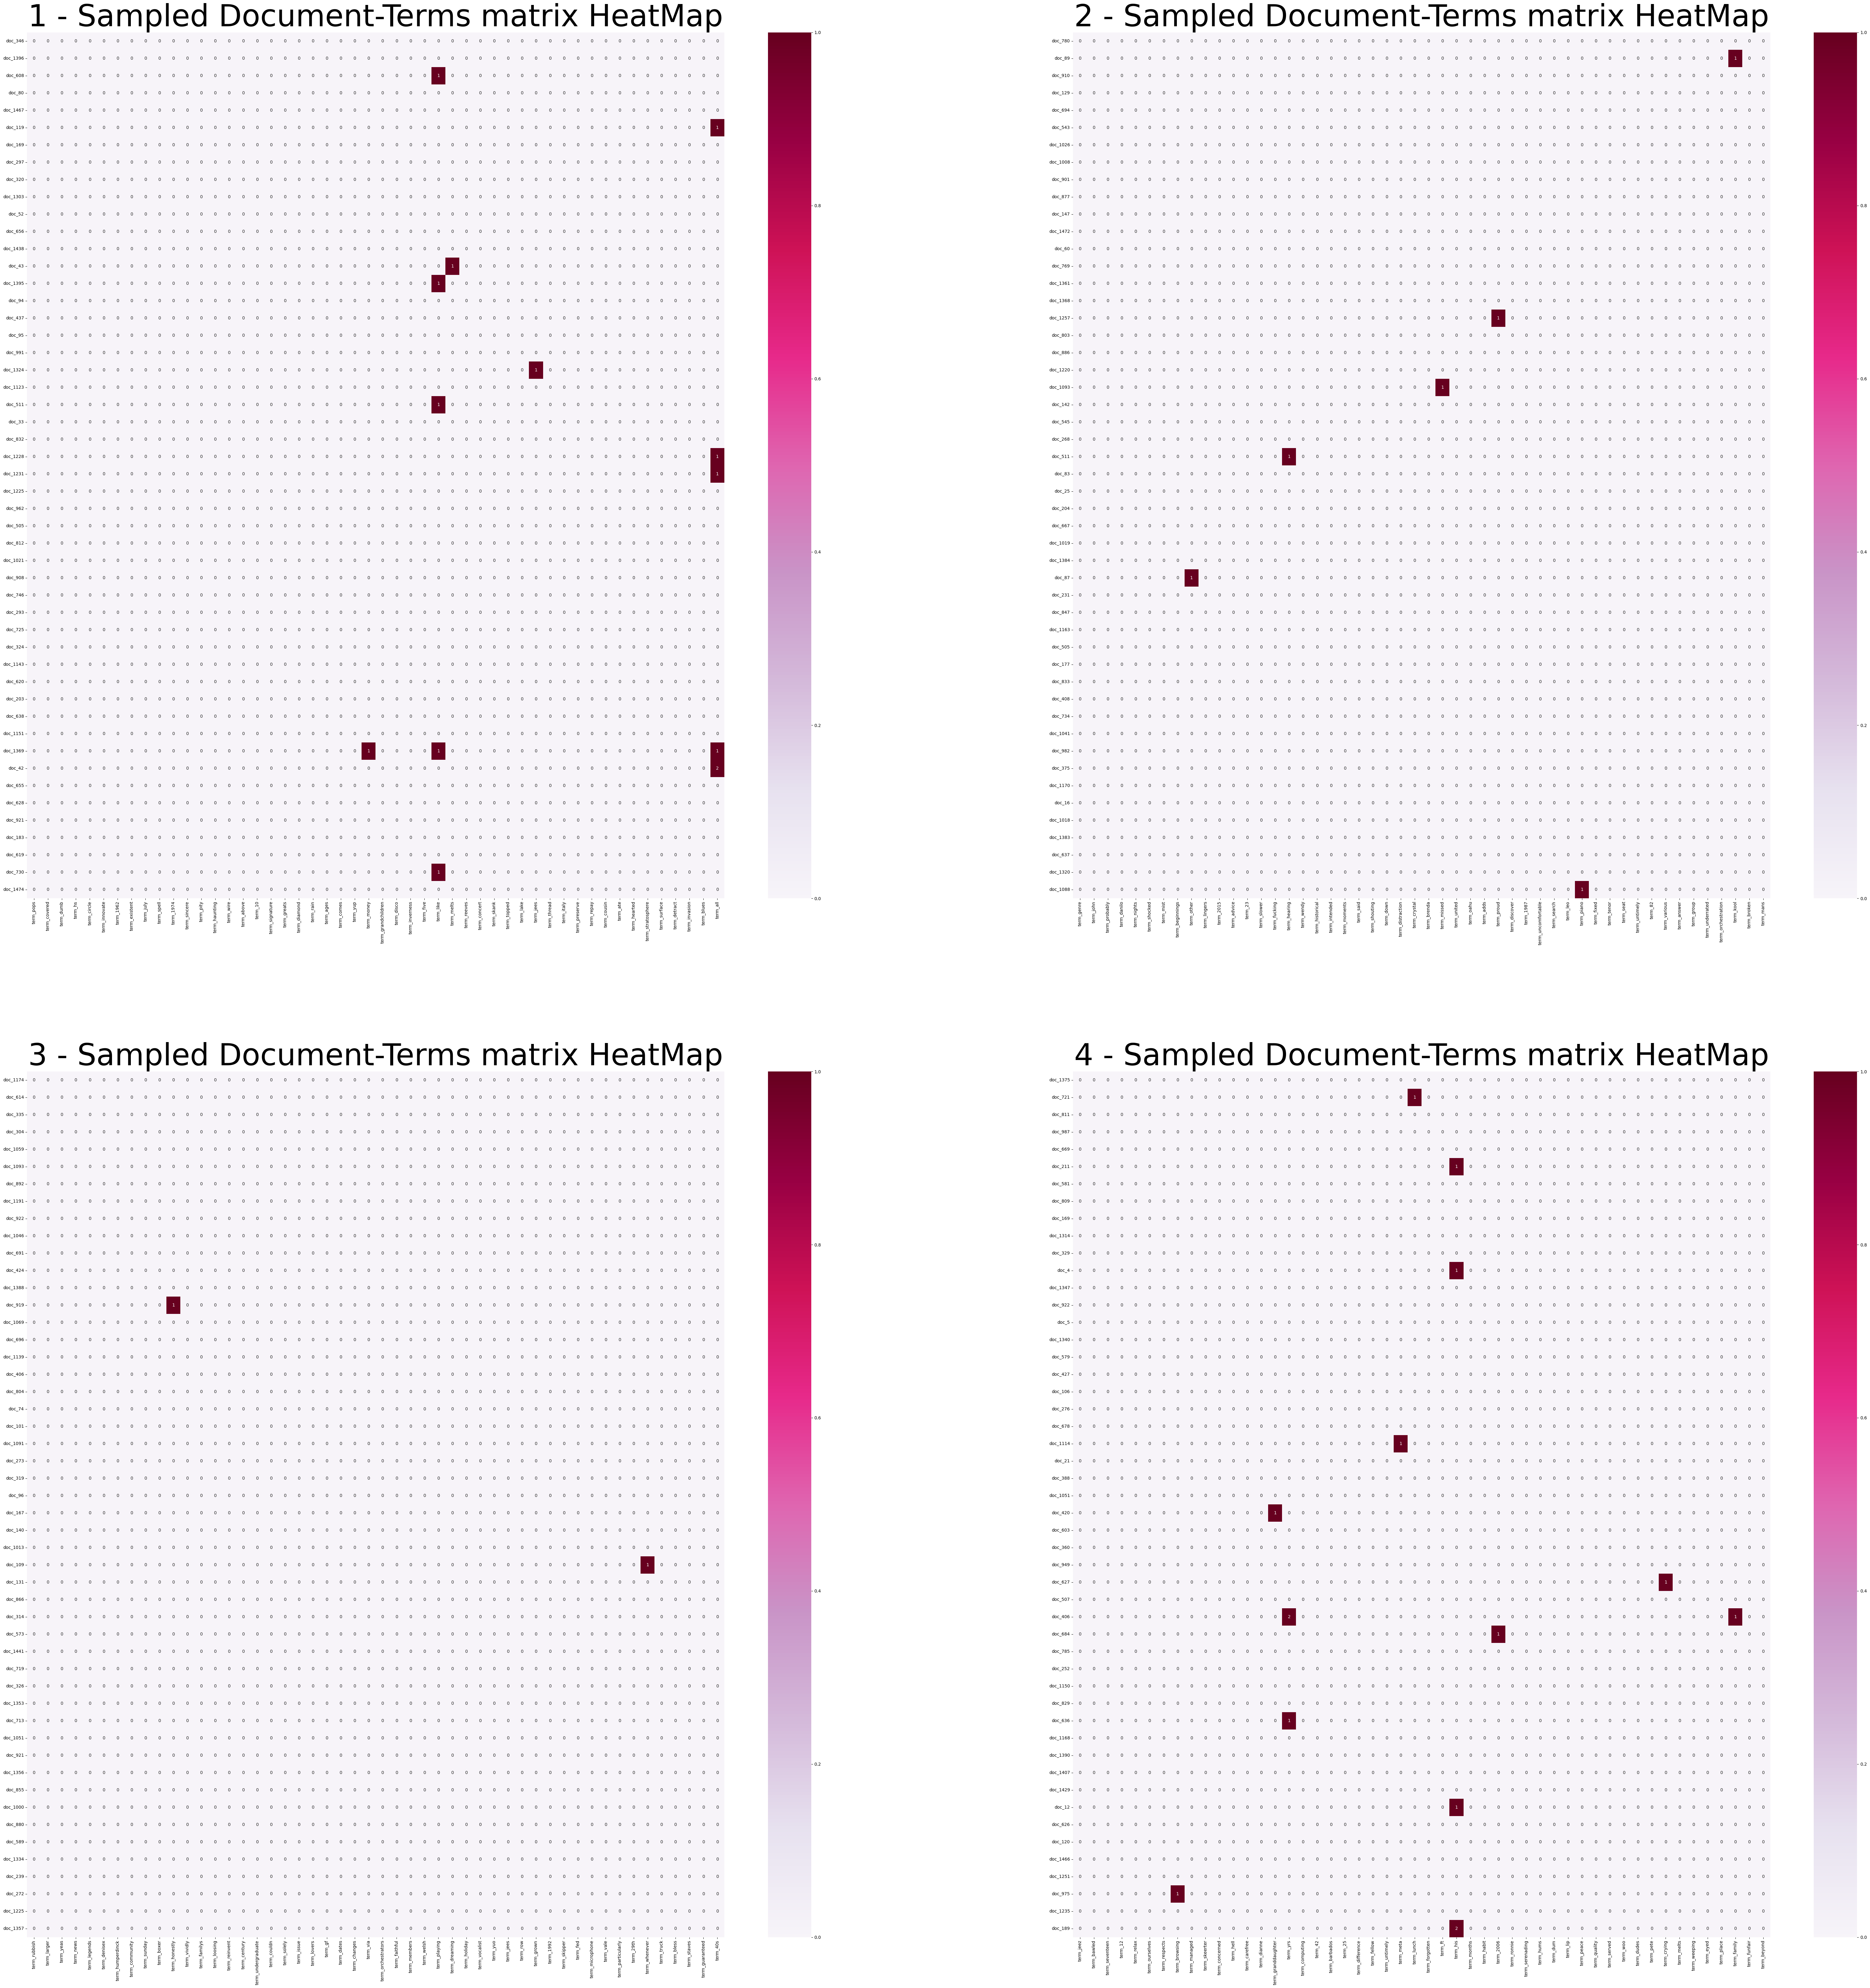

In [28]:
#focusing on top 20 documnet
#random sampling existed terms

fig, ax = plt.subplots(2,2, figsize = [80,80])

axes = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]

for i in range(0, 3+1):

    # sample_term first ( or you can given terms )
    term_index = list(range(0, len(count_vect_2.get_feature_names_out())))
    sampled_term_index = rd.sample(term_index, k = 50)


    sumed_docu = X_counts_2.toarray()[:,sampled_term_index].sum( axis = 1)
    docu_index = list(range(0, X_counts_2.shape[0])) 
    sampled_docu_index = np.random.choice(docu_index, size = 50, replace = False)

    #ploting

    plot_x = ["term_" + i for i in count_vect_2.get_feature_names_out()[sampled_term_index]]
    plot_y = ["doc_" + str(i) for i in sampled_docu_index]
    plot_z = X_counts_2[:, sampled_term_index][sampled_docu_index,:].toarray()



    sampled_df = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
    sns.heatmap(sampled_df,
                cmap="PuRd",
                vmin=0, vmax=1, annot=True , ax = axes[i])
    axes[i].set_title( f"{i+1} - Sampled Document-Terms matrix HeatMap", size = 70)



plt.subplots_adjust()
plt.show()



Based on the plots we draw above, after sampling for a few times,we can find there are some terms are quite frequent. However, some of them are sparse. The situation will be more clearer, after calculating frequency ! 

##### 4.4 Attribute Transformation/Aggregation
- Apply the document-term matrix we made, and analyze the word distribution in aggregating way. 

In [30]:
term_frequencies_2 = X_counts_2.toarray().sum(axis = 0)
term_frequencies_2[:10]

array([ 1,  2,  1,  2, 16,  5,  1,  8,  1, 11], dtype=int64)

Set threshold and see the terms distribution

**Threshold = 200**
- To see what are the common terms

In [31]:

# Choose the specific frequency number as threshold

threshold = 200   # show the terms appear more than 1000 times

wanted_index = np.where( term_frequencies_2 >= threshold)[0]  # np.where() output is tuple

wanted_term = count_vect_2.get_feature_names_out()[wanted_index]
wanted_freq = term_frequencies_2[wanted_index]

temp_df = pd.DataFrame(
    {
      "Term":  wanted_term,
      "Freq" : wanted_freq
    }
)


px.bar(temp_df, x = "Freq", y = "Term", title = f"The Terms with Frequency more than {threshold}" )

px.line()

Based on the bar plot **The Terms with Frequency more than 200**, we can see most of the terms are number, and some are more than 500. Ex: 10038, 922, 915. 

Draw long tail histogram 

C:\Users\UX425JA\AppData\Local\Temp\ipykernel_45788\3089891775.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



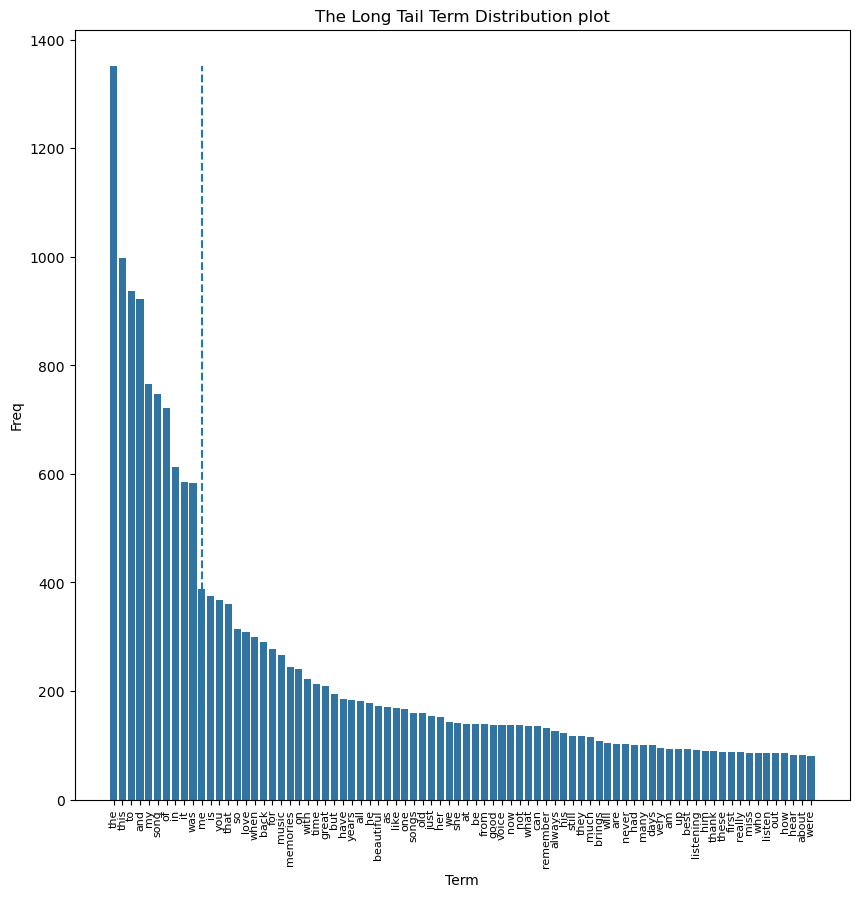

In [74]:
num = 80  # top num to choose

sorted_freq_index = np.argsort(term_frequencies_2)[::-1]
sorted_term = count_vect_2.get_feature_names_out()[sorted_freq_index][:num]
sorted_freq = term_frequencies_2[sorted_freq_index][:num]

plt.figure(figsize = [10,10])
temp_df = pd.DataFrame({
    "Term" : sorted_term,
    "Freq" : sorted_freq
})

ax = sns.barplot(temp_df, x = "Term", y = "Freq")
ax.set_xticklabels(temp_df.Term, rotation = 90, size = 8)

ax.vlines(10, ymin = 0, ymax = sorted_freq[0], linestyles = "dashed")

ax.set_title("The Long Tail Term Distribution plot")



plt.show()

In [75]:
sorted_term[:11]

array(['the', 'this', 'to', 'and', 'my', 'song', 'of', 'in', 'it', 'was',
       'me'], dtype=object)

By Long tail distribution plot, we can find after the red dashed line, dropping around 200 freqencies. The common terms before the red line are **'the', 'this', 'to', 'and', 'my', 'song', 'of', 'in', 'it', 'was'** 。 We can see **song** may be quite common in our comments. 

**Apart from these terms, the curve is actually quite smooth.** 

##### 4.5 Frequent Pattern
- Draw Term Frequency Distribution graphics
    - Filter top and bottom terms
- Apply PAMI library
    - Transactional Data
    - Frequent Pattern Mining 
        - TOP K Freq
        - Maximal 
        - Minimum 

In [76]:
# Make Document-Term Matrix for each category

def make_doc_term_matrix(df):
    count_vect = CountVectorizer() 
    X_counts = count_vect.fit_transform(df['comment']) 
    terms = count_vect.get_feature_names_out() 
    result = pd.DataFrame(X_counts.toarray(), columns = terms)

    return result


sep_df = [ df[df["sentiment"] == i ] for i in df.sentiment.unique()]
name = df.sentiment.unique()

filt_term_document_dfs = { name[i]:make_doc_term_matrix(sep_df[i]) for i in range(0, 1+1)} 



In [77]:
print(filt_term_document_dfs)

{'not nostalgia':      00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo

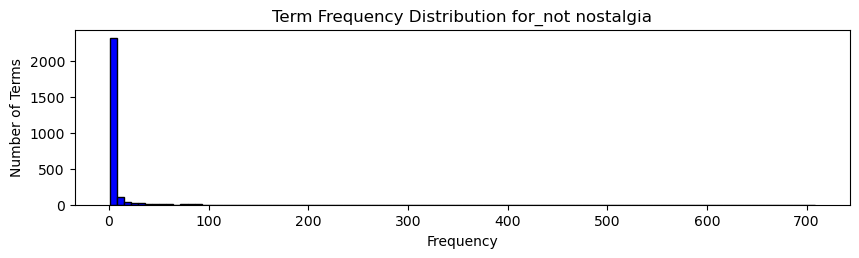

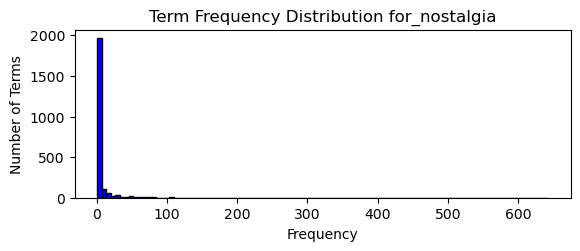

In [78]:
plt.figure(figsize=[10, 5])

for i in range(0, 1+1):

    plt.subplot(2,1,i+1)
    cate = i
    cate_name = df.sentiment.unique()[cate]
    temp_sum = filt_term_document_dfs[cate_name].sum(axis = 0)


    plt.hist(temp_sum, bins=100, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for_{cate_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')

    plt.show()

From this graph, **most of our words are not common**, but there are some need to be filtered

In [79]:

# freq_dist_dict function helps us create table to see the distribution 

def freq_dist_dict(df):


    freq_nos = np.array(df.sum(axis = 0))
    table = {}

    for i in freq_nos:
        if i > 400 : 
            table[">400"] = table.get(">400",0) + 1
        elif i > 300 :
            table["301 - 400"] = table.get("301 - 400", 0) + 1
        elif i > 200 : 
            table["201 - 300"] = table.get("201 - 300", 0 ) +1
        elif i > 100 : 
            table["100 - 200"] = table.get("100 - 200", 0) + 1
        elif i > 50:
            table[ "50 - 100" ] = table.get("50 - 100", 0) + 1
        else:
            table[ "<50" ] = table.get("<50", 0) + 1

    return table

- Nostagia

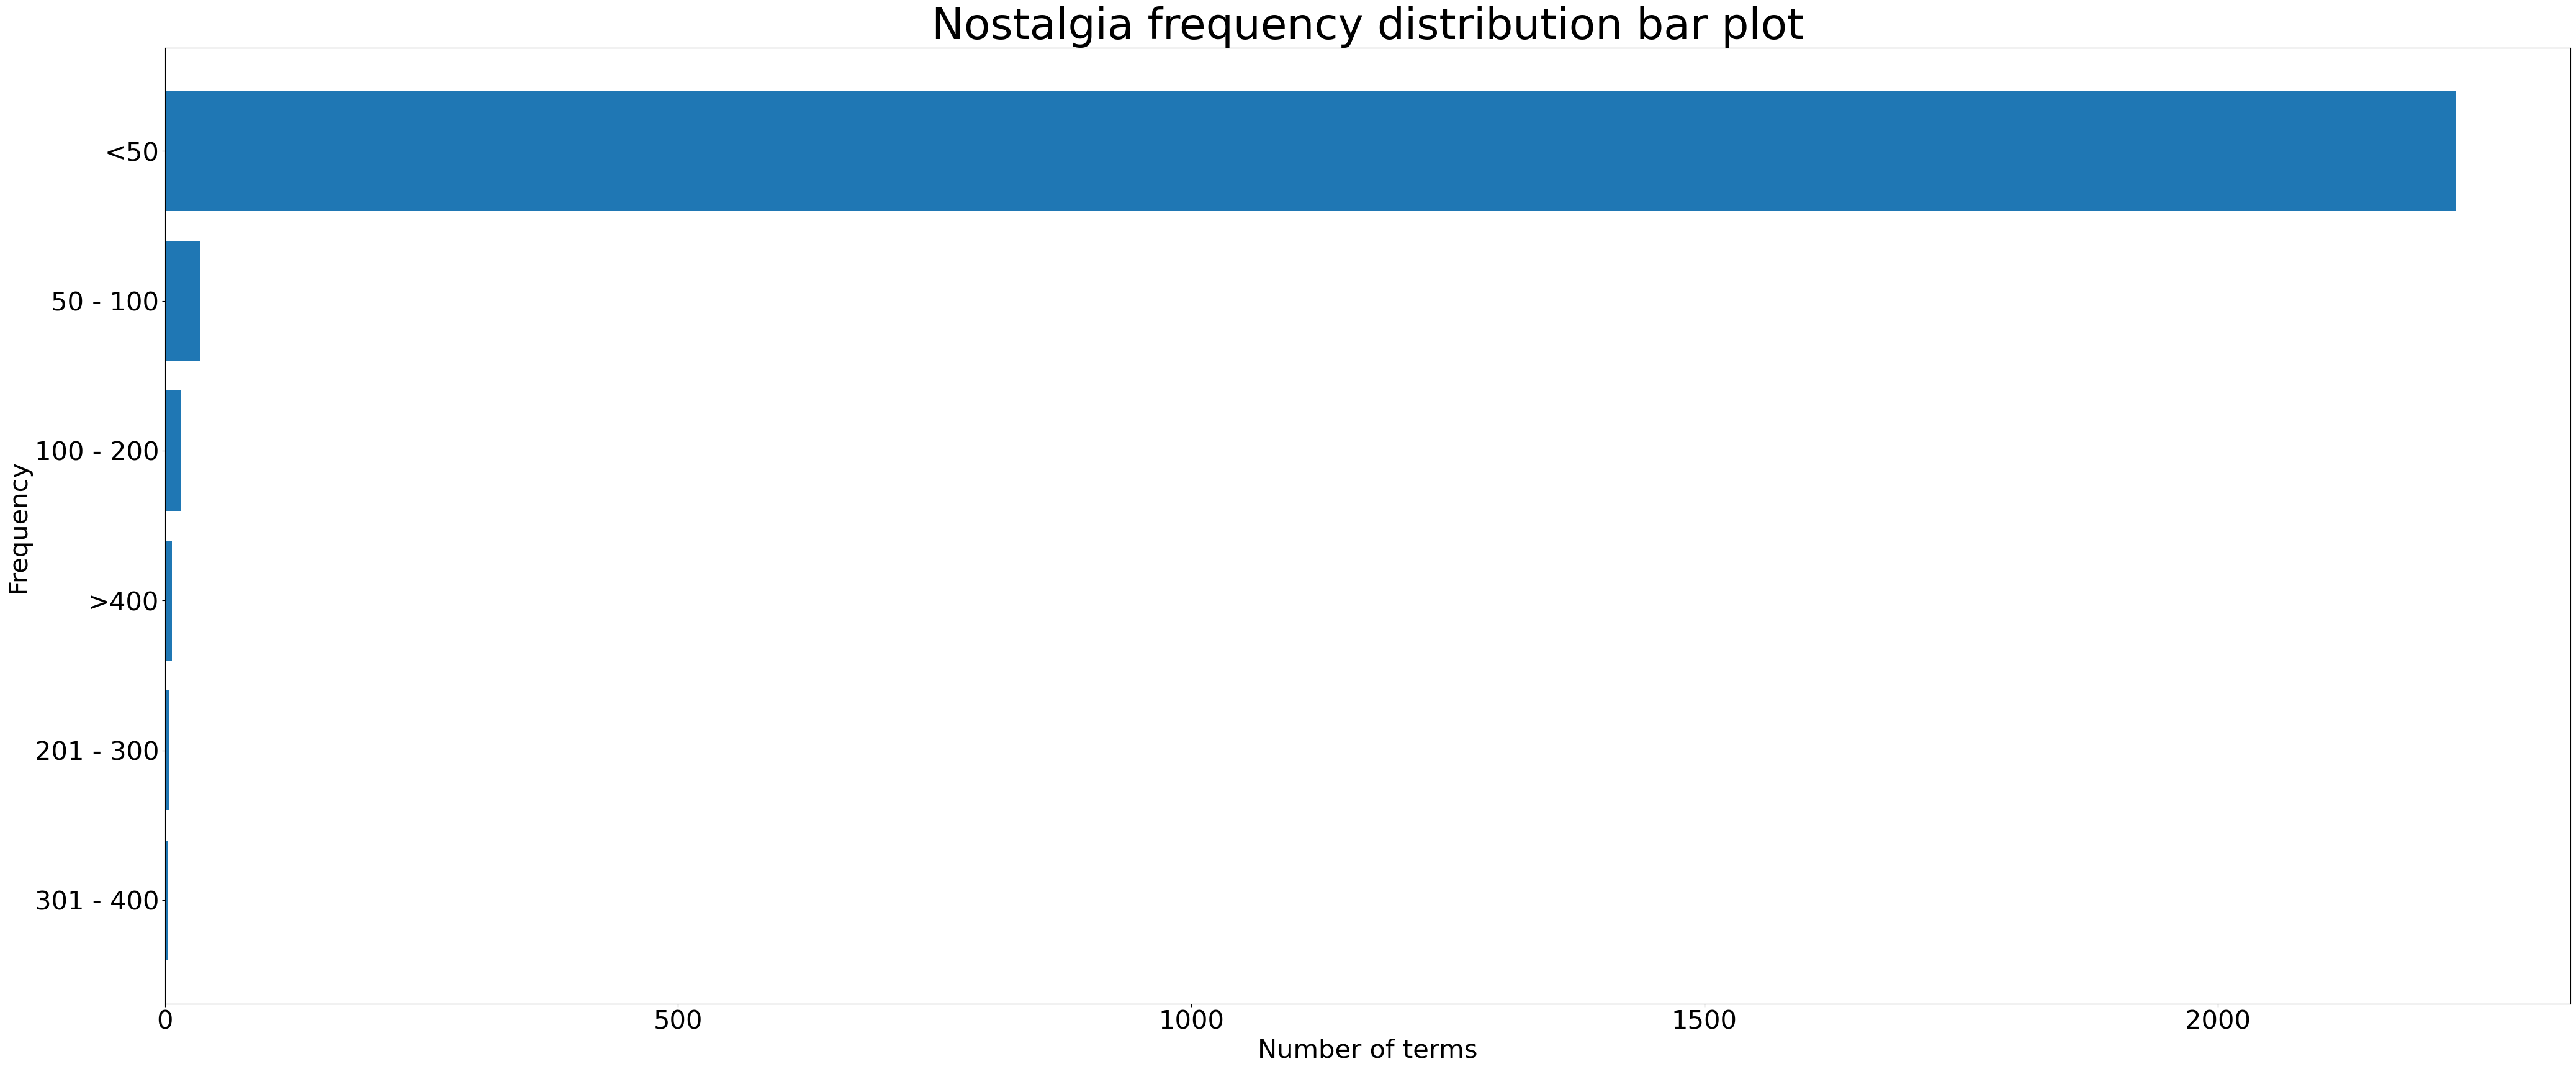

In [80]:
table  = freq_dist_dict(filt_term_document_dfs["nostalgia"])

sorted_index = list(np.argsort(list(table.values())))

x = np.array(list(table.keys()))[sorted_index]
y = np.array(list(table.values()))[sorted_index]

plt.figure(figsize = [50, 20])
plt.barh( x, y,)
plt.title("Nostalgia frequency distribution bar plot", size = 50)
plt.xlabel("Number of terms", size = 30)
plt.ylabel("Frequency", size = 30)

plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)


plt.show()


**Discover Top 3% and bottom 1% terms**

In [81]:
terms = filt_term_document_dfs["nostalgia"].columns
freq_nos = np.array(filt_term_document_dfs["nostalgia"].sum(axis = 0))

sorted_index = np.argsort(freq_nos)[::-1]

top_index = sorted_index[ :int(len(freq_nos) * 0.03)]
bottom_index = sorted_index[::-1][ :int(len(freq_nos) * 0.01) ]

top_filtered = terms[top_index]
bottom_filtered = terms[ bottom_index ]

print( f"Nostalgia top-filtered terms : {top_filtered}")
print("-------------------------------------------------------------")
print( f"Nostalgia bottom-filtered terms : {bottom_filtered}")



Nostalgia top-filtered terms : Index(['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me',
       'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for',
       'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great',
       'brings', 'we', 'beautiful', 'as', 'all', 'but', 'now', 'days', 'at',
       'miss', 'good', 'songs', 'childhood', 'reminds', 'her', 'from', 'still',
       'he', 'just', 'always', 'have', 'she', 'first', 'dad', 'many', 'had',
       'much', 'listening', 'his', 'like', 'loved', 'up', 'used', 'school',
       'were', 'very', 'am', 'one', 'those', 'voice'],
      dtype='object')
-------------------------------------------------------------
Nostalgia bottom-filtered terms : Index(['yup', 'gospel', 'rose', 'round', 'rousing', 'goodness', 'routine',
       'row', 'ronnie', 'rpg', 'ruined', 'rules', 'running', 'sadder',
       'saddest', 'glimpses', 'safer', 'rubbish', 'grabbed', 'grace',
       'romanticism', 'rightly'],
    

For the top terms, most of them are stopping words, so it's good to filter them. However, I think bottom terms may have some unique and signoificant words, therefore, we can try to just filter top terms.

In [82]:
#Filtering

def filter_top_bottom_df_terms(df, top_percent, bottom_percent):
    '''
    df : Data Frame need to be filtered columns
    top_percent : the percentage to filter the toppest frequency
    bottom_percent : the percentage to filter the bottom frequency

    output is a Dataframe
    '''
    terms = df.columns
    freq_nos = np.array(df.sum(axis = 0))
    sorted_index = np.argsort(freq_nos)[::-1]

    top_index = sorted_index[ :int(len(freq_nos) * top_percent)]
    bottom_index = sorted_index[::-1][ :int(len(freq_nos) * bottom_percent) ]
    

    if top_index.shape[0] > 0 :

        top_filtered = terms[top_index]
        df = df.drop( columns = top_filtered )

    if bottom_index.shape[0] > 0 :
        bottom_filtered = terms[bottom_index]
        df = df.drop( columns = bottom_filtered )
    
   
    return df


In [83]:
term_document_dfs = {}
term_document_dfs["nostalgia"] = filter_top_bottom_df_terms(filt_term_document_dfs["nostalgia"], 0.03, 0)
term_document_dfs

{'nostalgia':      07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
 0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
 2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 ..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
 745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
 748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
 
 

Review Term Frequency Distribution bar plot,I think we filter quite well.

In [84]:
table  = freq_dist_dict(term_document_dfs["nostalgia"])

print("Term Frequency Distribution after filtering :")
print(table)

Term Frequency Distribution after filtering :
{'<50': 2227}


- Non-Nostagia

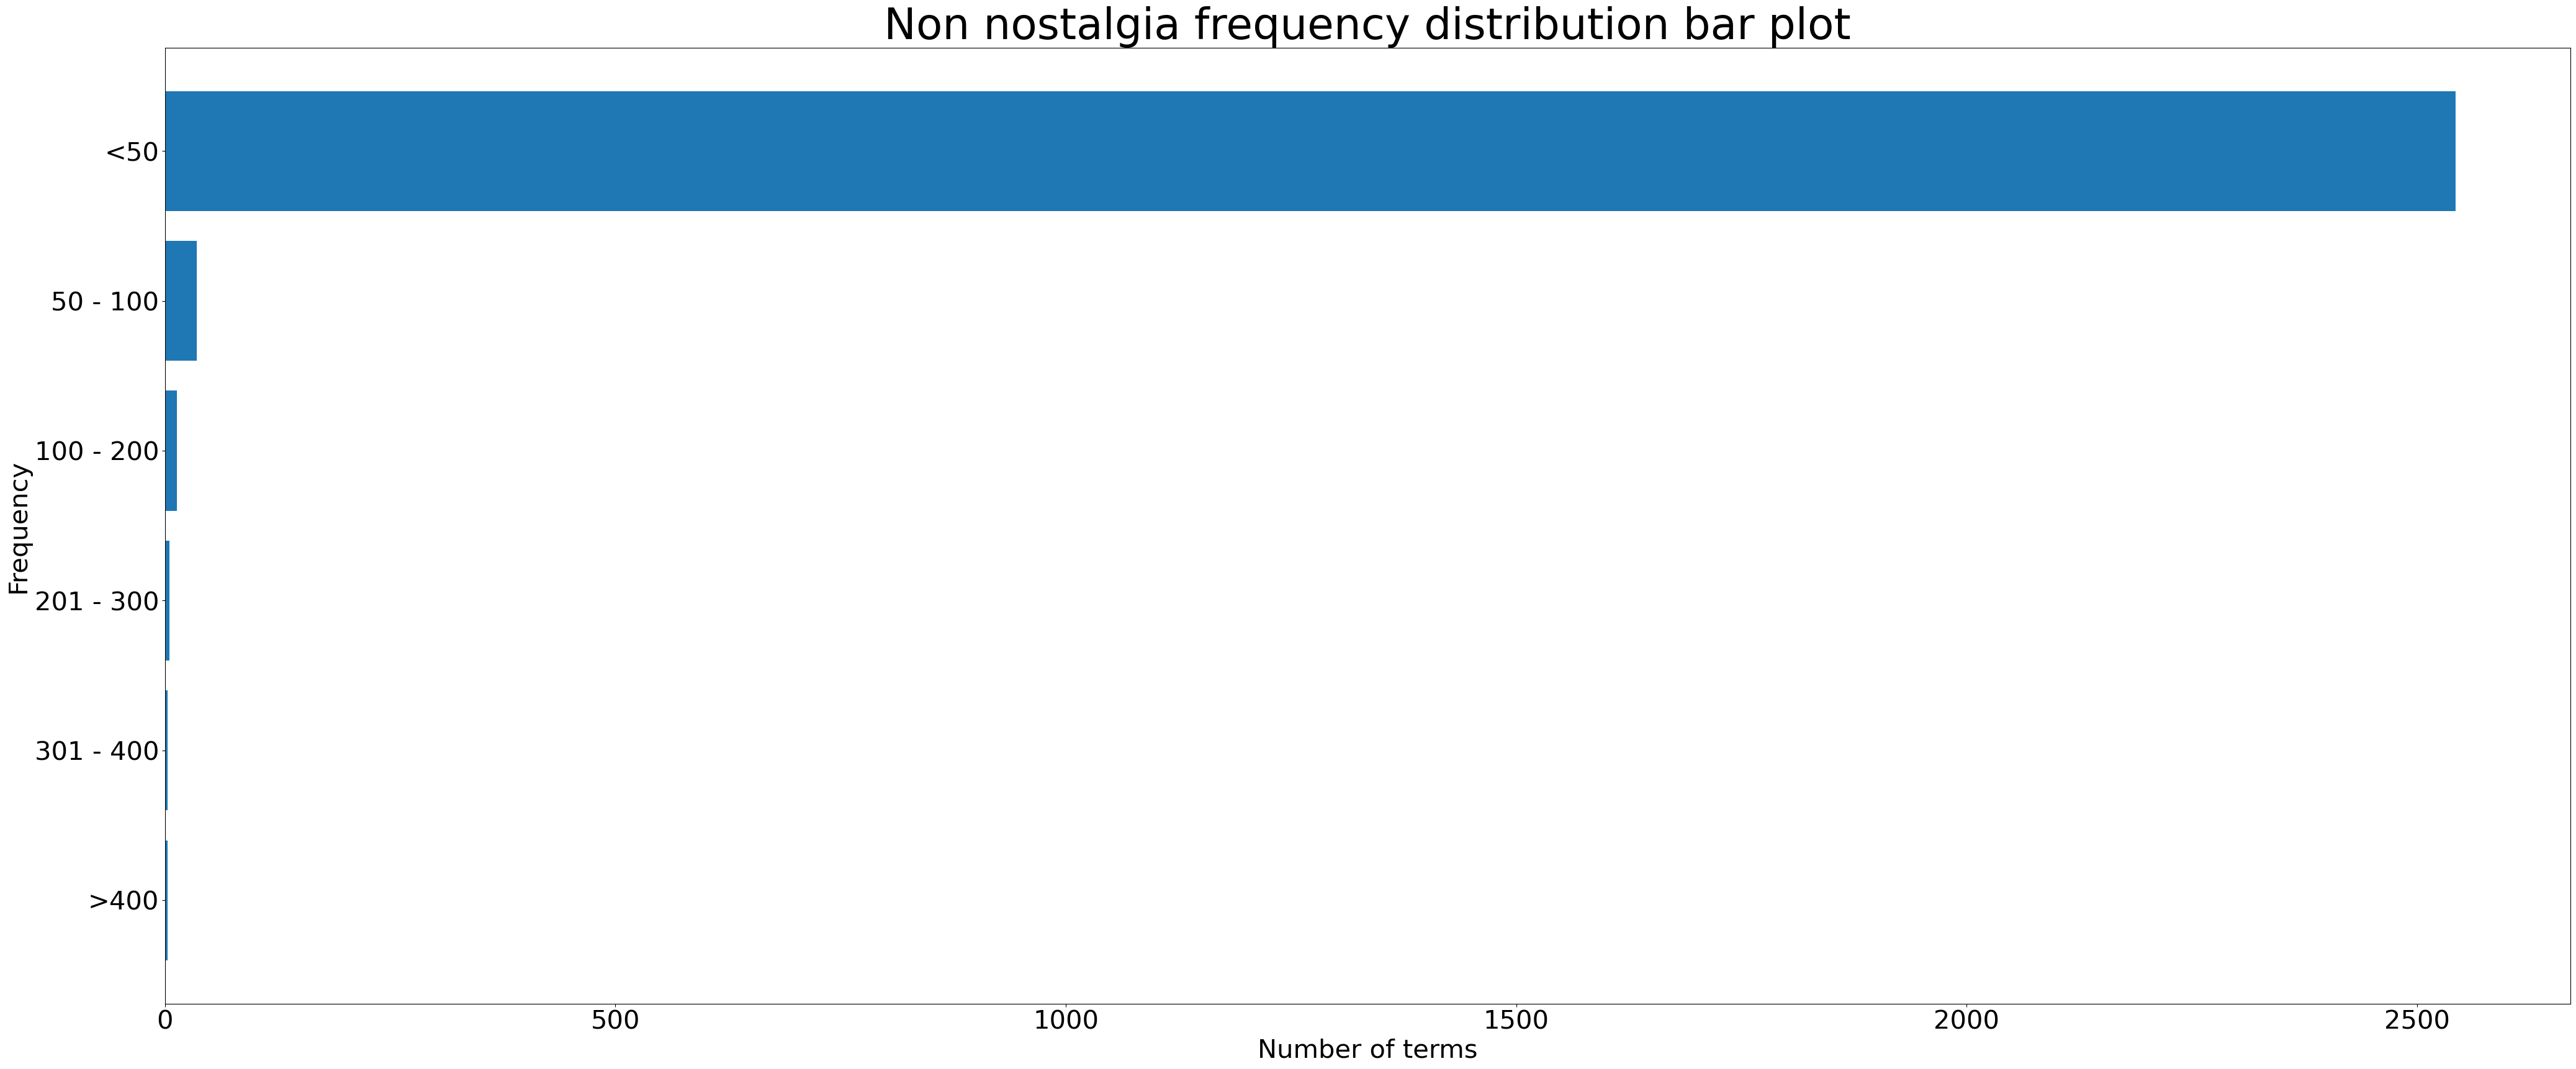

In [87]:
table  = freq_dist_dict(filt_term_document_dfs["not nostalgia"])


sorted_index = list(np.argsort(list(table.values())))

x = np.array(list(table.keys()))[sorted_index]
y = np.array(list(table.values()))[sorted_index]

plt.figure(figsize = [50, 20])
plt.barh( x, y,)
plt.title("Non nostalgia frequency distribution bar plot", size = 50)
plt.xlabel("Number of terms", size = 30)
plt.ylabel("Frequency", size = 30)

plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)

plt.show()

Discover Top 3% and Bottom 1% terms

In [88]:
terms = filt_term_document_dfs["not nostalgia"].columns

sorted_index = np.argsort(freq_nos)[::-1]

top_index = sorted_index[ :int(len(freq_nos) * 0.03)]
bottom_index = sorted_index[::-1][ :int(len(freq_nos) * 0.01) ]

top_filtered = terms[top_index]
bottom_filtered = terms[ bottom_index ]

print( f"Not nostalgia top-filtered terms : {top_filtered}")
print("-------------------------------------------------------------")
print( f"Not nostalgia bottom-filtered terms : {bottom_filtered}")

Not nostalgia top-filtered terms : Index(['shared', 'machine', 'shots', 'sincerely', 'april', 'reminds',
       'strickly', 'melt', 'hates', 'henderson', 'lee', 'baritone', 'levis',
       'super', 'relationships', 'that', 'shape', 'message', 'jr', 'excuse',
       'simmons', 'they', 'parts', 'men', 'talking', 'height', 'lowest',
       'fresh', 'briefly', 'stumble', 'beings', 'auto', 'anything', 'btw',
       'measure', 'curios', 'awakened', 'lived', 'floaty', 'reminiscing',
       'cigarette', 'pavillion', 'granddaughter', 'failing', 'rock', 'god',
       'hope', 'appear', 'glitter', 'puts', 'europe', 'crap', 'lane', 'gen',
       'lover', 'introduction', 'greats', 'interested', 'judging',
       'soundtracks', 'special', 'predicting', 'suggestive', 'standard',
       'appearances', 'met', 'shoulder', 'stealing'],
      dtype='object')
-------------------------------------------------------------
Not nostalgia bottom-filtered terms : Index(['though', 'floyd', 'plan', 'planet', 'platf

As for non nostalgia,I think the situation is quite similar with nostalgia. Therefore, we can try same percentage.

In [89]:
term_document_dfs["Not nostalgia"] = filter_top_bottom_df_terms(filt_term_document_dfs["not nostalgia"], 0.03, 0)  # Top 3% Bottom 1%
term_document_dfs["Not nostalgia"]

,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Review Term Frequency Distribution bar plot,I think we filter quite well.

In [90]:
table  = freq_dist_dict(term_document_dfs["Not nostalgia"])
print("Not nostalgia after filtering terms")
print(table)

Not nostalgia after filtering terms
{'<50': 2524}


- <font size = "5">PAMI</font>
  1. <font size = "4">Convert filtered data to **transactional data**, and discover the pattern of our terms.</font>
  2. apply minimum algorithm to mine the combination of our terms

In [91]:
from PAMI.extras.convert.DF2DB import DF2DB  

#Make Transactional Data

for i in term_document_dfs.keys():   #對filter完top bottom 的df 做transactional data

    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB( term_document_dfs[i] )

    obj.convert2TransactionalDatabase(f'td_freq_db_{i}.csv', '>=', 1)
    

- Transactional data - Nostalgia

In [92]:
X_counts_2.toarray().shape

(1499, 3730)

Database size (total no of transactions) : 744
Number of items : 2227
Minimum Transaction Size : 1
Average Transaction Size : 10.834677419354838
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 8.621106361479466
Variance in Transaction Sizes : 74.42350649068727
Sparsity : 0.9951348552225618


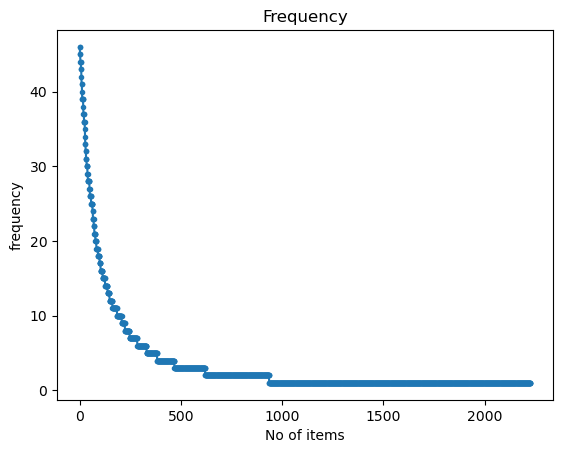

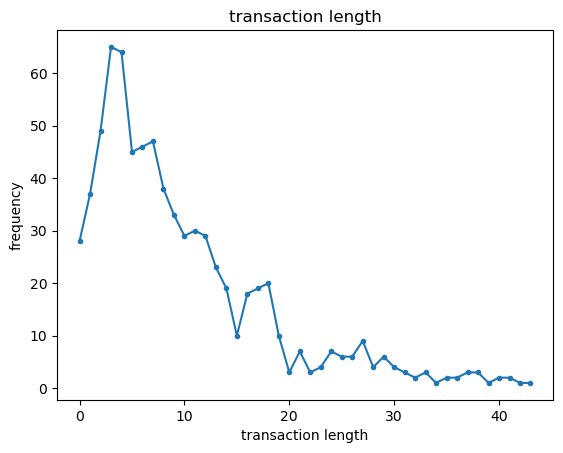

In [93]:
#Nostalgia

from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()
plt.show()

# In nostalgia, we have
# 744 documents
# 2227 terms 
# The sparsity is quite large

- Transanctional Data - Non nostalgia

Database size (total no of transactions) : 749
Number of items : 2524
Minimum Transaction Size : 1
Average Transaction Size : 10.399198931909213
Maximum Transaction Size : 51
Standard Deviation Transaction Size : 6.801362417446728
Variance in Transaction Sizes : 46.32037368898281
Sparsity : 0.9958798736402895


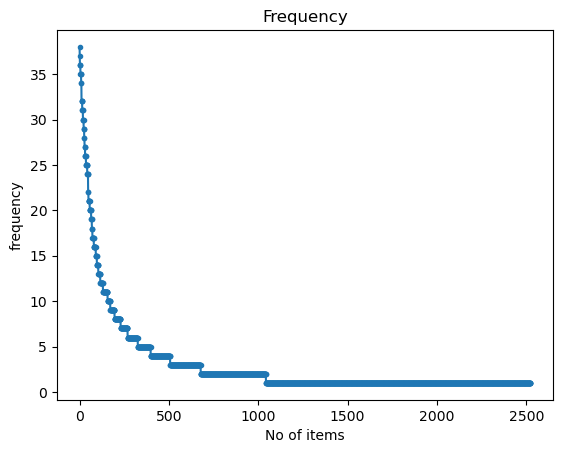

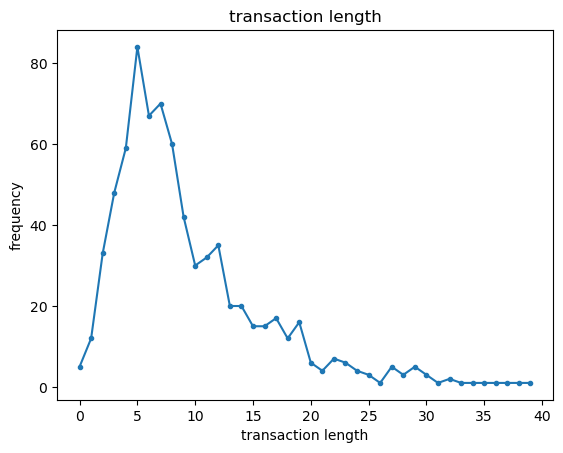

In [94]:
#Non nostalgia

from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_Not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()
plt.show()

# In Not nostalgia, we have
# 749 documents
# 2524 words 
# The sparsity is quite large

After **Item Frequency** and **Transaction Length**, we found out 
- Most of comments' lenghes weren't too long (around 10) -> The combination of our patterns is small
- Most of items' frequency are under 10 -> Our items won't show up oftenly, and some are unique terms

- As a result, we can't set minimum too high.

However, we can still try different minsup, and draw the plot of support lengths to help us tune this parameter.

In [95]:
# Minimum

from PAMI.frequentPattern.basic import FPGrowth as alg

total_num_patterns_nos = []
total_num_patterns_non_nos = []

for i in range(4, 15+1):

    minSup = i

    obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
    obj1.mine()

    obj2 = alg.FPGrowth(iFile='td_freq_db_Not nostalgia.csv', minSup=minSup)
    obj2.mine()
    
    frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
    frequentPatternsDF_non_nostalgia= obj2.getPatternsAsDataFrame()

    total_num_patterns_nos.append( len(frequentPatternsDF_nostalgia) )
    total_num_patterns_non_nos.append( len(frequentPatternsDF_nostalgia) )


    
    

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth al

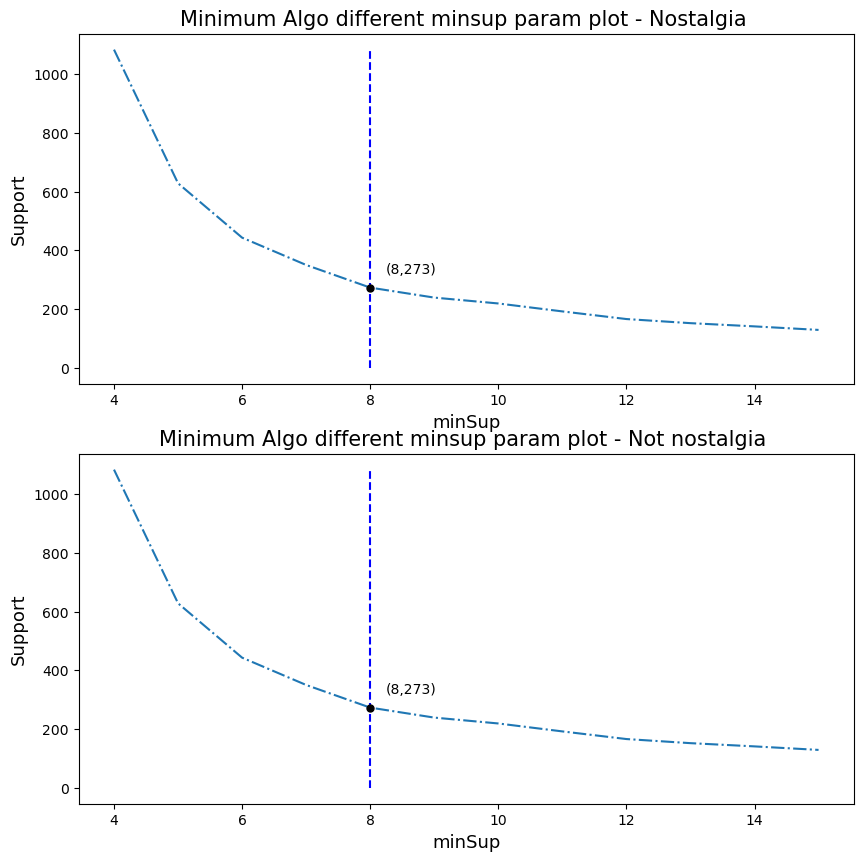

In [96]:
plt.figure(figsize = [10,10])

plt.subplot(211)

plt.plot(range(4,15+1), total_num_patterns_nos, "-.")

plt.title("Minimum Algo different minsup param plot - Nostalgia ", size = 15)
plt.xlabel("minSup", size = 13)
plt.ylabel("Support", size = 13)

plt.vlines(8, 0, np.max(total_num_patterns_nos), linestyles = "dashed", colors = "b" )
plt.text(8+0.25, total_num_patterns_nos[4] + 50, f"(8,{total_num_patterns_nos[4]})")
plt.plot(8, total_num_patterns_nos[4], marker = ".", color = "black", markersize = 10)


plt.subplot(212)

plt.plot(range(4,15+1), total_num_patterns_non_nos, "-.")

plt.title("Minimum Algo different minsup param plot - Not nostalgia ", size = 15)
plt.xlabel("minSup", size = 13)
plt.ylabel("Support", size = 13)
plt.vlines(8, 0, np.max(total_num_patterns_non_nos), linestyles = "dashed", colors = "b" )


plt.text(8+0.25, total_num_patterns_non_nos[4] + 50, f"(8,{total_num_patterns_non_nos[4]})")
plt.plot(8, total_num_patterns_non_nos[4], marker = ".", color = "black", markersize = 10)

plt.subplots_adjust()

plt.show()

Based on the plot above, I think **minsup 8** may be good for both of categories.

In [97]:
# nostalgia
minSup = 8
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()

print('minSup = 8')
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup = 8
Total No of patterns: 273
Runtime: 0.007154941558837891


In [98]:
# Not nostalgia
minSup = 8
obj2 = alg.FPGrowth(iFile='td_freq_db_Not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_non_nostalgia = obj2.getPatternsAsDataFrame()

print('minSup = 8')
print('Total No of patterns: ' + str(len(frequentPatternsDF_non_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
minSup = 8
Total No of patterns: 236
Runtime: 0.016383647918701172


In [99]:
obj1.save("freq_patterns_nostalgia_minSup8.txt")
obj2.save("freq_patterns_Non_nostalgia_minSup8.txt")

In [100]:
frequentPatternsDF_nostalgia

,Patterns,Support
0,17,8
1,feeling,8
2,june,8
3,wedding,8
4,grandparents,8
...,...,...
268,heard,45
269,times,45
270,never,46
271,never be,10


In [101]:
frequentPatternsDF_non_nostalgia

,Patterns,Support
0,jim,8
1,hope,8
2,king,8
3,future,8
4,radio,8
...,...,...
231,listen,36
232,had,36
233,do,36
234,an,37


In [102]:
# combine both of their patterns
patterns = [frequentPatternsDF_nostalgia, frequentPatternsDF_non_nostalgia]

- <font size = "5">Filter patterns across differnt categories <font>

In [103]:
set_nos = set(patterns[0]["Patterns"])
set_non_nos = set(patterns[1]["Patterns"])
unique_terms = set_nos.symmetric_difference(set_non_nos)    # the unique terms between two categories

num_discarded = 0 

# Pick the unique patterns, then concat it as final_pattern_df

final_pattern_df = []
for i in range(0, 1+1):
    temp_df = patterns[i]
    final_pattern_df.append(temp_df[temp_df["Patterns"].isin(unique_terms)])
    num_discarded = num_discarded + (temp_df["Patterns"].shape[0] - final_pattern_df[i].shape[0])



final_pattern_df = pd.concat(final_pattern_df)
final_pattern_df.sort_values(by='Support', ascending=False, ignore_index = True,inplace = True)

print(final_pattern_df)
print("----------------------------------------------------------------")
print(f"Number of patterns discarded: {num_discarded}")


      Patterns  Support
0        never       46
1           be       46
2          can       44
3        these       42
4         what       41
..         ...      ...
250       mean        8
251       hits        8
252  bless god        8
253      bless        8
254         17        8

[255 rows x 2 columns]
----------------------------------------------------------------
Number of patterns discarded: 254


Initially, we have 509 total patterns, after dropping some common terms, there is 255 patterns left.


Augment Our Initial Document-Term Matrix 

1. Tokenized original comments and count the amount of our filtered patterns.
2. Concat with initial document-term matrix as augmented data.




In [104]:
# 1 

ind = range(0,  df.shape[0])
pattern_matrix = pd.DataFrame(0, columns = list(final_pattern_df.Patterns), index = ind)

#Tokenized our comments

df["tokenized_text"] = df.comment.apply( lambda x : set(str(x).split() ))


for pattern in pattern_matrix.columns:

    pattern_words = set(pattern.split())  # split pattern words to check if all of them are inside tokenized comment

    # issubset is reported whether another set contains this set.(pattern_words contains in tokenized_text)
    pattern_matrix[pattern] = list(map( lambda x : 1 if pattern_words.issubset(x) else 0 ,df["tokenized_text"]))


# 2
initial_doc_terms = pd.DataFrame(X_counts_2.toarray(), columns = count_vect_2.get_feature_names_out())
augu_df = pd.concat([initial_doc_terms, pattern_matrix], axis = 1)
augu_df



,00,000,045,07,10,100,10m,11,11th,12,...,best are,full,looking,guys,change,mean,hits,bless god,bless,17
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 4.6 Dimension Reduction
- PCA
- T-SNE
- UMAP

Till now we have two dataframes, 
- "Initial Document-Term Matrix"

In [105]:
initial_doc_terms

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- "Augmented Matrix"

In [106]:
augu_df

,00,000,045,07,10,100,10m,11,11th,12,...,best are,full,looking,guys,change,mean,hits,bless god,bless,17
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Besides, we will genetate a new document matrix called "TF-IDF" as well.
, and apply these three dimension reduction methods.

- Initial Document-term matrix 

In [109]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

X_pca_ini = PCA(n_components = 2).fit_transform(initial_doc_terms.values)
X_tsne_ini = TSNE(n_components = 2).fit_transform(initial_doc_terms.values)
X_umap_ini = umap.UMAP(n_components=2).fit_transform(initial_doc_terms.values)

In [110]:
print( X_pca_ini.shape )
print( X_tsne_ini.shape )
print( X_umap_ini.shape )

(1499, 2)
(1499, 2)
(1499, 2)


In [111]:
print("Initial DataFrame:")
initial_doc_terms

Initial DataFrame:


,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Augumented matrix

In [112]:
X_pca_aug = PCA(n_components = 2).fit_transform(augu_df.values)
X_tsne_aug = TSNE(n_components = 2).fit_transform(augu_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augu_df.values)

In [113]:
print( X_pca_ini.shape )
print( X_tsne_ini.shape )
print( X_umap_ini.shape )

(1499, 2)
(1499, 2)
(1499, 2)


In [114]:
print("Augmented DataFrame:")
augu_df

Augmented DataFrame:


,00,000,045,07,10,100,10m,11,11th,12,...,best are,full,looking,guys,change,mean,hits,bless god,bless,17
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF features**
- TF(Term Frequency) : 
    - **Horizontally.** Focusing on term frequency in each document.
    - Count each terms' frequency in each document. 
    - Like CountVectorizer(), which is what we did. 
- IDF(Inverse Document frequency)　： 
    - **Vertically.** How many documents have this term ? 
    - More frequent, less effective.

TF-IDF will try to illustrate the terms with high TF, but low IDF.

[Method]("https://blog.csdn.net/qq_43391414/article/details/112912107") \
[Introduction to TF-IDF](https://www.cc.ntu.edu.tw/chinese/epaper/0031/20141220_3103.html)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
output_vectorizer = tf_idf_vectorizer.fit_transform(df.comment)


In [116]:
print("Terms extracted by TfidfVectorizer : ")
print(tf_idf_vectorizer.get_feature_names_out())
print("The document matrix shape : ")
print( output_vectorizer.toarray().shape )  # 3730 terms

Terms extracted by TfidfVectorizer : 
['00' '000' '045' ... 'yup' 'zealand' 'zulus']
The document matrix shape : 
(1499, 3730)


In [117]:
tfidf_docum_matrix = pd.DataFrame(output_vectorizer.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())
print("TS-IDF DataFrame:")
tfidf_docum_matrix

TS-IDF DataFrame:


,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
X_pca_tf_idf = PCA(n_components = 2).fit_transform(tfidf_docum_matrix.values)
X_tsne_tf_idf = TSNE(n_components = 2).fit_transform(tfidf_docum_matrix.values)
X_umap_tf_idf = umap.UMAP(n_components=2).fit_transform(tfidf_docum_matrix.values)

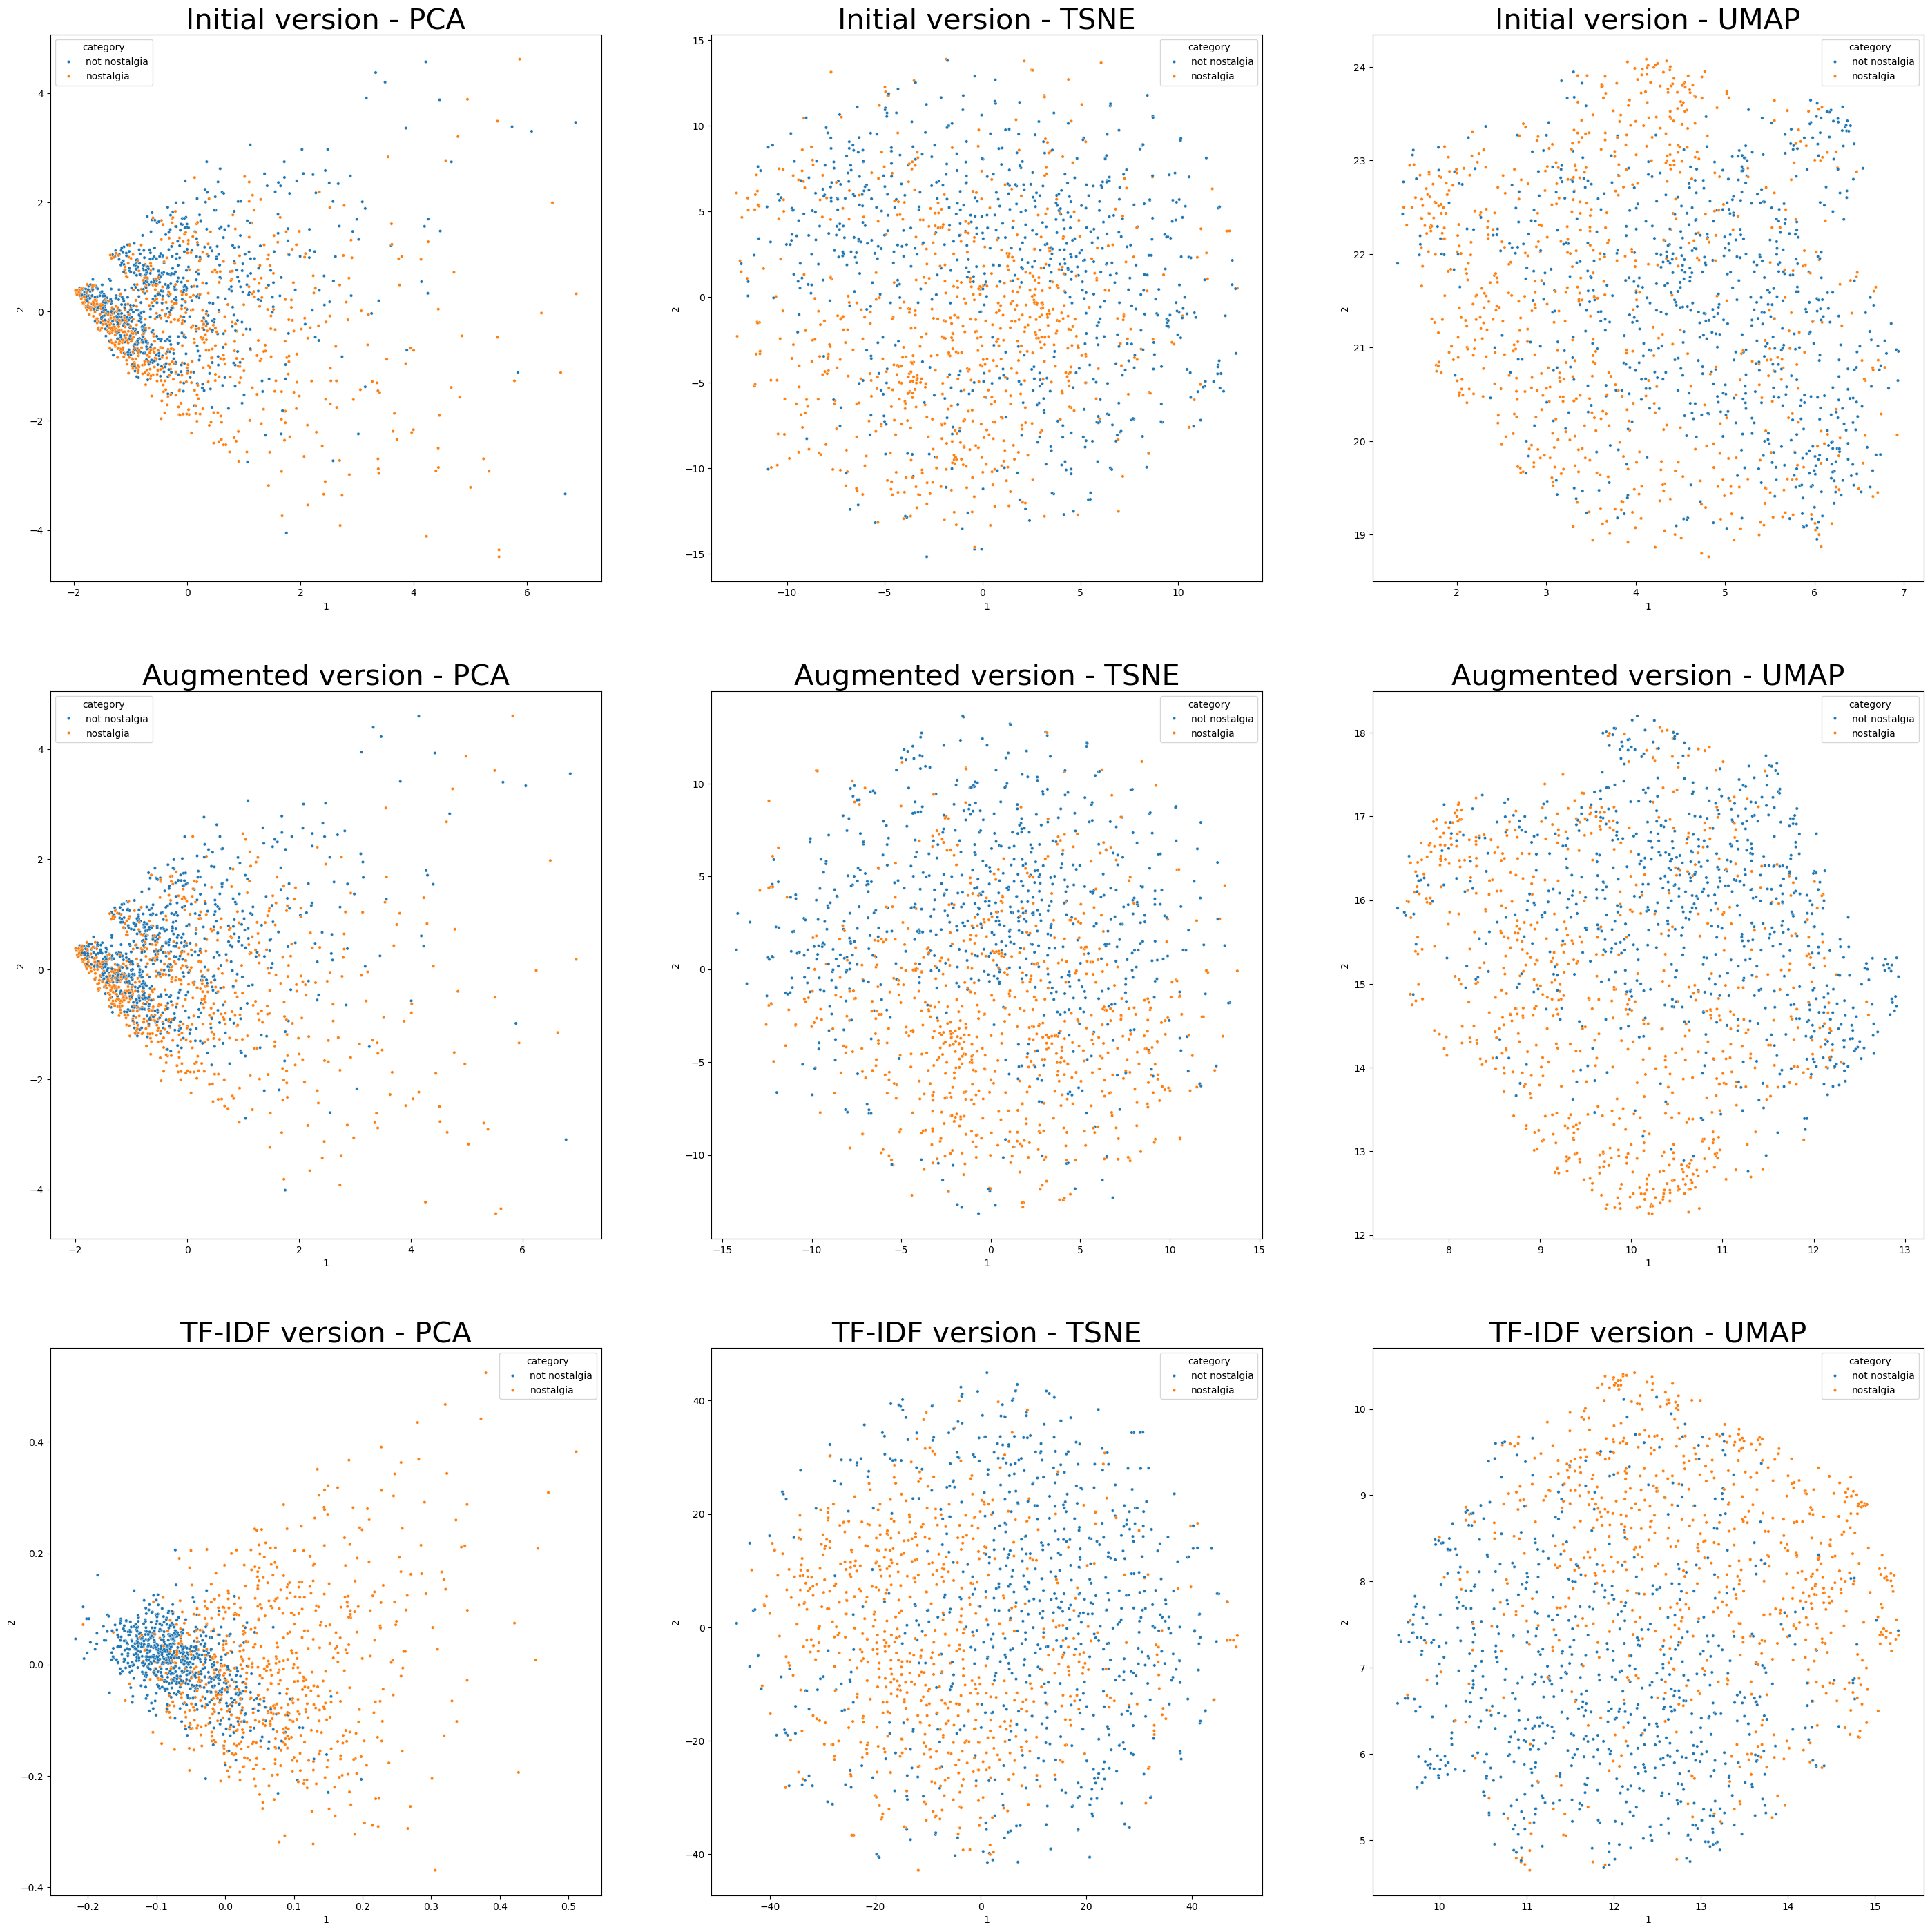

In [119]:
fig, axes = plt.subplots(3,3, figsize = [35,35])

reduced_list_ini_df = [ X_pca_ini, X_tsne_ini, X_umap_ini ]
reduced_list_aug_df = [ X_pca_aug, X_tsne_aug, X_umap_aug ]
reduced_list_tf_idf = [ X_pca_tf_idf, X_tsne_tf_idf, X_umap_tf_idf ]

reduced_list = [reduced_list_ini_df, reduced_list_aug_df, reduced_list_tf_idf]

method = ["Initial", "Augmented", "TF-IDF"]
name = ["PCA", "TSNE", "UMAP"]

cate_name = list(df.sentiment)

for i in range(0, 2+1):
    for j in range(0, 2+1):
        temp_data = pd.DataFrame(reduced_list[i][j], columns = ["1", "2"])

        temp_data["category"] = list(df.sentiment)

        sns.scatterplot( temp_data, x = "1", y = "2", hue = "category", marker = "o", s = 10,
                        ax = axes[i][j])

        axes[i][j].set_title(f"{method[i]} version - " + name[j], size = 30)

plt.show()

According to the subplots above,
- **Vertically** we used different dataframes to reduce dimentsion. It's quite obvious **TF-IDF has the best separation**.
The reason I think is TF-IDF will consider not only the frequencies of each documents, but also the terms across different documents. The term is more unique, the weight is more higher, which can enhance our seperation.

- **Horizontally** we implement different methods, 
    - For Initial Data, I think UMAP is the best.
    - For Augmented Data, I think TSNE is better, but UMAP is good as well.
    - For TF-IDF, I will say three of them perform ideally, but propbably UMAP is a little bit better.

Overall, **The structure and extracting methods are the keys.** Let's see how's their classification.

##### 4.7 Discretization and Binarization
- Transformation category as one-hot encoding

In [120]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category)

LabelBinarizer()

In [121]:
df['bin_category'] =  mlb.transform(df['category']).tolist()

In [122]:
df[0:9]

,sentiment,comment,category,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{days, life., those, singers, have, You, you, ...",[0]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{The, ever, an, love, still, was, voice, angel...",[1]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{never, They, my, were, Jesus, sweet,, simple,...",[1]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{""marry, receive., This, 30, my, came, have, y...",[0]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{of, who, reminds, mum, my, played, him, to, h...",[1]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{funerals., death,, appreciate, touches, heard...",[1]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{teenager, didn't, but, it, me, was, Reeves,, ...",[1]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{me, love, he, LISTENED, tunes, nostalgic, i, ...",[1]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{are, my, heart, always, in, you, Wherever}",[0]


### 5. Data Exploration

In [123]:
document_to_transform_1 = []
random_record_1 = df.loc[10, 'comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.loc[120, 'comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.loc[250, 'comment']
document_to_transform_3.append(random_record_3)



In [124]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['ill bet if they begin to play this song on the radio to a new generation it could be still a hit ,,that goes for anytime in the future']
['all his songs brings tears to my eyes so many memories']
['When I was a little girl, I listened this song.. and I loved it !!!! Thanks a lot !!!! ']


In [125]:
from sklearn.preprocessing import binarize

#transform  comment to Vectorizers
document_vector_count_1 = count_vect_2.transform(document_to_transform_1)
document_vector_count_2 = count_vect_2.transform(document_to_transform_2)
document_vector_count_3 = count_vect_2.transform(document_to_transform_3)


# Binarize vectors to simplify: 0 for abscence, 1 for prescence

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors and its shape:")

print(document_vector_count_1.todense(), document_vector_count_1.todense().shape)
print(document_vector_count_2.todense(), document_vector_count_2.todense().shape)
print(document_vector_count_3.todense(), document_vector_count_3.todense().shape)



Let's take a look at the count vectors and its shape:
[[0 0 0 ... 0 0 0]] (1, 3730)
[[0 0 0 ... 0 0 0]] (1, 3730)
[[0 0 0 ... 0 0 0]] (1, 3730)


In [126]:
from sklearn.metrics.pairwise import cosine_similarity

# Category

print(f" The category of 1 is {df.loc[10, 'sentiment']} ")
print(f" The category of 2 is {df.loc[120, 'sentiment']} ")
print(f" The category of 3 is {df.loc[250, 'sentiment']} ")


# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

 # Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

 The category of 1 is not nostalgia 
 The category of 2 is nostalgia 
 The category of 3 is nostalgia 
Cosine Similarity using count bw 1 and 2: 0.108306
Cosine Similarity using count bw 1 and 3: 0.155543
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\UX425JA\AppData\Local\Temp\ipykernel_45788\1365578284.py:19: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\UX425JA\AppData\Local\Temp\ipykernel_45788\1365578284.py:20: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\UX425JA\AppData\Local\Temp\ipykernel_45788\1365578284.py:21: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\UX425JA\AppData\Local\Temp\ipykernel_45788\1365578284.py:22: DeprecationWarning:

Conversion of an array with nd

<font size = "5" > Cosine similarity between 2 elements are quite low. Even though 2 and 3 are the same category, the similarity is the lowest.
<font>

### 6. Data Classification


We have three types of dataframes, 

   1. **Initial** : The Document-Term matrix generated by customized CountVectorizer().
   2. **Augmented** : Find the patterns, and mine the unique one ( Helpful to do classification). Concat with the initial dataframe.
   3. **TF-IDF** : For each term, calculate its weight by the frequecny vertically and horizontally. 

I will try the original data, and reduced dimension one.


---

Classifier : Naive Bayes classifier
- **Multinomial naive Bayes**: \
  Based on the **number of occurrences**,, for example, the number of occurrences of a term or its relative frequency

- **Gaussian Naive Bayes**:\
  Useful when working with **continuous values**

- 70/30 split for the training and test set.



In [127]:
 #Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [128]:
cate_list = list(df.category)
dict_cate = ["not nostalgia" , "nostalgia" ]

# Initial one

X_train, X_test, y_train, y_test = train_test_split(X_counts_2.toarray(), cate_list, test_size=0.3 )


 # Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier

print("The performance of Initial dataframe : ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = dict_cate, digits=4))

The performance of Initial dataframe : 
Accuracy: 0.86

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9239    0.7913    0.8525       230
    nostalgia     0.8103    0.9318    0.8668       220

     accuracy                         0.8600       450
    macro avg     0.8671    0.8616    0.8596       450
 weighted avg     0.8683    0.8600    0.8595       450



In [129]:
# Augmented one

X_train, X_test, y_train, y_test = train_test_split(augu_df.values, cate_list, test_size=0.3 )


 # Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier

print("The performance of Augumented dataframe : ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = dict_cate, digits=4))

The performance of Augumented dataframe : 
Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9158    0.7982    0.8529       218
    nostalgia     0.8308    0.9310    0.8780       232

     accuracy                         0.8667       450
    macro avg     0.8733    0.8646    0.8655       450
 weighted avg     0.8720    0.8667    0.8659       450



In [130]:
# Tf-IDF

X_train, X_test, y_train, y_test = train_test_split(tfidf_docum_matrix.values, cate_list, test_size=0.3 )

 # Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier

print("The performance of TF-IDF dataframe : ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = dict_cate, digits=4))

The performance of TF-IDF dataframe : 
Accuracy: 0.66

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.6961    0.5625    0.6222       224
    nostalgia     0.6357    0.7566    0.6909       226

     accuracy                         0.6600       450
    macro avg     0.6659    0.6596    0.6566       450
 weighted avg     0.6658    0.6600    0.6567       450



Based on the performance report for three kind of data

In [131]:
'''
mulNB_class is a function return accuracy to implement our Naive classification
For TF-IDF and reduced dimension, since the variables are continuous, we use Gaussion Naive Bayes.
For Initial, Augmented data , since the variables are frequency, we use Multinomial Naive Bayes.
'''


def mulNB_class(X_train, X_test, y_train, y_test, Tf_ornot): 
     # Train the Naive Bayes classifier
     
    if Tf_ornot == True:
      nb_classifier = GaussianNB()
    else:
      nb_classifier = MultinomialNB()

    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = nb_classifier.predict(X_test)
    # Evaluate the classifier   
    return accuracy_score(y_test, y_pred)

In [132]:
'''
Do ten times classfication with different train data and test data 
to original Data and reduced dimension data
'''

sep_n = 10 #the num of separation
doc_num = X_counts_2.toarray().shape[0]
cate_array = np.array(cate_list)


# Stored the accuracy of initial, augement, tf-idf data
init_per = []
auge_per = []
tfidf_per = []

# Stored the accuracy of reduced dimension data with the most suitable method(personally)
# initial : umap
# augement : tsne
# tf-idf data :umap

init_umap_per = []
auge_tsne_per = []
tfidf_umap_per = []



for i in range(0, 9+1):
    
    #shuffle index 
    sep_index = np.repeat(range(1, sep_n+1), np.ceil(doc_num/sep_n))
    np.random.shuffle(sep_index)
    sep_index = sep_index[0:doc_num]


    train_index = np.where(sep_index != sep_n)[0]
    test_index = np.where(sep_index == sep_n)[0]

    # Multinomial Naive (frequency)
    init_per.append( mulNB_class(X_train = X_counts_2.toarray()[train_index,], X_test = X_counts_2.toarray()[test_index,], y_train = cate_array[train_index], y_test = cate_array[test_index], Tf_ornot = 0 ) )
    auge_per.append( mulNB_class(X_train = augu_df.values[train_index,], X_test = augu_df.values[test_index,], y_train = cate_array[train_index], y_test = cate_array[test_index], Tf_ornot = 0 ) )
    
    # Gaussion Naive (Because it's continuous variables)
    tfidf_per.append( mulNB_class(X_train = tfidf_docum_matrix.values[train_index,], X_test = tfidf_docum_matrix.values[test_index,], y_train = cate_array[train_index], y_test = cate_array[test_index], Tf_ornot = 1) )

    # Gaussion Naive (Because it's continuous variables)
    init_umap_per.append( mulNB_class(X_train = reduced_list_ini_df[2][train_index,], X_test = reduced_list_ini_df[2][test_index,], y_train = cate_array[train_index], y_test = cate_array[test_index], Tf_ornot = 1 ) )
    auge_tsne_per.append( mulNB_class(X_train = reduced_list_aug_df[1][train_index,], X_test = reduced_list_aug_df[1][test_index,], y_train = cate_array[train_index], y_test = cate_array[test_index], Tf_ornot = 1 ) )
    tfidf_umap_per.append( mulNB_class(X_train = reduced_list_tf_idf[2][train_index,], X_test = reduced_list_tf_idf[2][test_index,], y_train = cate_array[train_index], y_test = cate_array[test_index], Tf_ornot = 1) )
    


In [133]:
temp_per = init_per + auge_per + tfidf_per
temp_per_red_dim = init_umap_per + auge_tsne_per + tfidf_umap_per 

temp_type = list(np.repeat(["Initial", "Augumented", "TF-IDF"], 10))
temp_df = [{ "Accuracy" : temp_per[i], "FrameType" : temp_type[i], "Time": (i % 10)+1, "Reduced_Dimension Accuracy" : temp_per_red_dim[i]} for i in range(0,29+1) ]


temp_df = pd.DataFrame(temp_df)
temp_df

,Accuracy,FrameType,Time,Reduced_Dimension Accuracy
0,0.880000,Initial,1,0.726667
1,0.906040,Initial,2,0.711409
2,0.880000,Initial,3,0.733333
3,0.880000,Initial,4,0.693333
4,0.913333,Initial,5,0.753333
5,0.873333,Initial,6,0.706667
6,0.866667,Initial,7,0.693333
7,0.886667,Initial,8,0.740000
8,0.846667,Initial,9,0.653333
9,0.853333,Initial,10,0.700000


In [134]:
import plotly.express as px 

In [135]:
px.line(temp_df, x = "Time", y = "Accuracy", line_group = "FrameType", color = "FrameType",
        title = "Accuracy comparison of three types of Document-Term Matrix (Full Dimension Version)")

In [136]:
px.line(temp_df, x = "Time", y = "Reduced_Dimension Accuracy", line_group = "FrameType", color = "FrameType",
        title = "Accuracy comparison of three types of Document-Term Matrix (Reduced Dimension Version)")


Based on the plot above,
1. Reduced dimension version doesn't have better performance. -> Probably reduce too much dimension.
2. The accuracy betweeen augmented data and Initial one doesn't have big gap, but Initial is slightly higher. -> The pattern combination is helpful.
3. TF-IDF has worsest performance in full dimension data, and I think the reasons can be boiled down to three points: 
   - (1). The strength of TF-IDF is enlarging uniqueness, but we found most of our terms are less frequent in aggregation part. It may weaken our uniqueness due to weight  calculation.
   - (2). TF-IDF is based on Bag-of-Word, which means it **doesn't consider the semantic** meaning of words.
   - (3). **TF-IDF prefers long sentence**, but our comment is around 5 averagely. 

